## 10-fold CV with 2-layer CNN as the best performance model in the Fish Classification Paper


### Import and env settings

In [81]:
import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import os

In [82]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)

### Variables/parameters used in this notebook

In [100]:
file = '../../data/home_sale_data_324_features_5_class.csv'

ckpt_path = "./ckpt/5_cls_lr005/"
os.makedirs(ckpt_path, exist_ok=True)

num_classes = 5
lr = 0.005
epochs = 120

### Prepare data

In [84]:
data = pd.read_csv(file)

'''suffle rows randomly'''
data = data.sample(frac=1)

labels = data['label']

data.head()

,OverallQual,GrLivArea,TotalSF,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemodAdd,Foundation_PConc,TotRmsAbvGrd,hasfireplace,ExterQual_Gd,BsmtQual_Ex,Fireplaces,HeatingQC_Ex,MasVnrArea,Total_porch_sf,BsmtFinType1_GLQ,KitchenQual_Ex,OpenPorchSF,GarageFinish_Fin,...,BsmtExposure_No,Neighborhood_OldTown,Foundation_BrkTil,GarageFinish_None,GarageCond_None,GarageQual_None,GarageType_None,MSSubClass_30,LotShape_Reg,PavedDrive_N,Foundation_CBlock,MSZoning_RM,HeatingQC_TA,CentralAir_N,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA,dummy_1,dummy_2,dummy_3,label
1388,0.777778,0.761086,0.553543,0.6,0.252530,0.431452,0.952632,0.341235,0.500568,0.963768,0.50,0.933333,1.0,0.740833,1.0,1.0,0.0,0.293793,1.0,0.428916,0.290505,0.0,0.0,0.226456,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hi
2193,0.555556,0.496274,0.277790,0.4,0.001104,0.268817,0.415789,0.210855,0.288718,0.304348,0.25,0.750000,0.0,0.516936,0.0,0.0,0.0,0.000000,1.0,0.000000,0.460231,0.0,0.0,0.000000,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,mid
616,0.222222,0.350917,0.174730,0.0,0.163872,0.000000,0.178947,0.269495,0.389345,0.304348,0.25,0.000000,0.0,0.421336,0.0,0.0,0.0,0.000000,0.0,0.000000,0.069808,0.0,0.0,0.000000,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,low
2216,0.666667,0.638216,0.405415,0.6,0.252530,0.548387,0.857895,0.283843,0.410625,0.898551,0.50,0.783333,1.0,0.674300,1.0,0.0,0.0,0.293793,1.0,0.000000,0.438068,0.0,0.0,0.203123,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,mid-hi
1290,0.444444,0.425781,0.212748,0.2,0.251426,0.193548,0.557895,0.328135,0.470124,0.695652,0.25,0.300000,0.0,0.421336,0.0,0.0,0.0,0.000000,0.0,0.359354,0.411166,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,low-mid


In [85]:
# drop label column
data.drop(['label'], axis=1, inplace=True)
data.describe()

,OverallQual,GrLivArea,TotalSF,GarageCars,Total_Bathrooms,GarageArea,YrBltAndRemod,TotalBsmtSF,1stFlrSF,YearBuilt,FullBath,YearRemodAdd,Foundation_PConc,TotRmsAbvGrd,hasfireplace,ExterQual_Gd,BsmtQual_Ex,Fireplaces,HeatingQC_Ex,MasVnrArea,Total_porch_sf,BsmtFinType1_GLQ,KitchenQual_Ex,OpenPorchSF,GarageFinish_Fin,...,Neighborhood_IDOTRR,BsmtExposure_No,Neighborhood_OldTown,Foundation_BrkTil,GarageFinish_None,GarageCond_None,GarageQual_None,GarageType_None,MSSubClass_30,LotShape_Reg,PavedDrive_N,Foundation_CBlock,MSZoning_RM,HeatingQC_TA,CentralAir_N,GarageType_Detchd,MasVnrType_None,GarageFinish_Unf,BsmtQual_TA,FireplaceQu_None,KitchenQual_TA,ExterQual_TA,dummy_1,dummy_2,dummy_3
count,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,...,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.000000,2911.0,2911.0,2911.0
mean,0.565136,0.542763,0.293431,0.353143,0.200863,0.317285,0.660811,0.326706,0.487996,0.719569,0.391876,0.570892,0.447956,0.542786,0.512882,0.335967,0.087255,0.171718,0.511508,0.159954,0.203170,0.290622,0.069392,0.176542,0.245620,...,0.031261,0.652697,0.082102,0.106493,0.054277,0.054277,0.054277,0.053590,0.047750,0.637582,0.073514,0.423222,0.158708,0.293370,0.066644,0.266919,0.605634,0.421848,0.439368,0.487118,0.511852,0.616627,0.0,0.0,0.0
std,0.155988,0.125193,0.119772,0.152244,0.133043,0.143976,0.242686,0.131930,0.131369,0.219351,0.138140,0.348189,0.497369,0.128554,0.499920,0.472409,0.282257,0.181727,0.499953,0.218350,0.163524,0.454127,0.254163,0.183129,0.430528,...,0.174051,0.476195,0.274568,0.308520,0.226602,0.226602,0.226602,0.225245,0.213273,0.480781,0.261024,0.494155,0.365467,0.455385,0.249447,0.442425,0.488798,0.493939,0.496395,0.499920,0.499945,0.486292,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.444444,0.451636,0.213557,0.200000,0.088659,0.215054,0.473684,0.247193,0.395003,0.590580,0.250000,0.250000,0.000000,0.421336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066964,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,0.555556,0.547807,0.282326,0.400000,0.164976,0.322581,0.652632,0.308172,0.481664,0.731884,0.500000,0.716667,0.000000,0.516936,1.000000,0.000000,0.000000,0.293793,1.000000,0.000000,0.179849,0.000000,0.000000,0.180865,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.0,0.0
75%,0.666667,0.621247,0.356447,0.400000,0.252530,0.387097,0.905263,0.405490,0.582574,0.934783,0.500000,0.900000,1.000000,0.600315,1.000000,1.000000,0.000000,0.293793,1.000000,0.353218,0.327089,1.000000,0.000000,0.309510,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

In [86]:
labels.unique()

array(['hi', 'mid', 'low', 'mid-hi', 'low-mid'], dtype=object)

In [87]:
'''one-hot encode the labels'''

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
# print(list(integer_encoded))

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels = onehot_encoder.fit_transform(integer_encoded)

print('Number of classes: ', len(labels[0]))
print(labels)

Number of classes:  5
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [88]:
data_np = data.to_numpy()
data_np.shape
data_np = data_np.reshape(len(data), 18, 18)
data_np.shape

(2911, 18, 18)

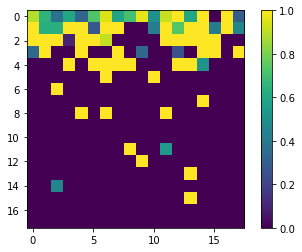

In [89]:
# data_np[0].shape

nArray = np.array(data_np[99])


a11=nArray.reshape(18,18)
plt.imshow(a11)
plt.colorbar()
plt.show()

In [90]:
labels.shape

(2911, 5)

In [91]:
all_examples = data_np
all_examples.shape

(2911, 18, 18)

#### train test splitting
- hold out 15% for testing
- use 85% to train model with K-fold CV

In [92]:
ttl_samples = all_examples.shape[0] 
test_ratio = 0.15
test_samples = int(test_ratio * all_examples.shape[0])

train_examples = all_examples[:-1*test_samples]
test_examples = all_examples[-1*test_samples:]

train_labels = labels[:-1*test_samples]
test_labels = labels[-1*test_samples:]


In [93]:
print('train: ', train_examples.shape)
print('test: ', test_examples.shape)
print('train label: ', train_labels.shape)
print('test label: ', test_labels.shape)

train:  (2475, 18, 18)
test:  (436, 18, 18)
train label:  (2475, 5)
test label:  (436, 5)


In [94]:
# trainX = train_examples.reshape(ttl_samples-test_samples, 18,18,1)
# trainY = train_labels

# testX = test_examples.reshape(test_samples, 18,18,1)
# testY = test_labels


### Prepare model

In [95]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')


def create_model(num_classes=5, lr=0.005):

	# Working
	with tf.device('/cpu:0'):
		data_augmentation = tf.keras.Sequential([ 
			tf.keras.layers.RandomFlip("horizontal", input_shape=(18, 18, 1)),
	  		tf.keras.layers.RandomRotation(0.1),
		    tf.keras.layers.RandomZoom(0.1)
			])


	model = tf.keras.Sequential([
		# data_augmentation,
	  	# tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
	  	tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(18, 18, 1)),
		tf.keras.layers.AveragePooling2D((2, 2)),
		tf.keras.layers.Dropout(0.1),
		tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
	  	tf.keras.layers.AveragePooling2D((2,2)),
		tf.keras.layers.Dropout(0.1),
		tf.keras.layers.Flatten(),
		tf.keras.layers.Dense(128, activation='relu'),
		tf.keras.layers.Dense(num_classes, activation='softmax')
	])

	# opt = tf.keras.optimizers.SGD(lr=0.005, momentum=0.9)
	opt = tf.keras.optimizers.Adam(lr=lr)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

	return model


Num GPUs Available:  1


In [96]:
model = create_model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 18, 18, 32)        320       
                                                                 
 average_pooling2d_12 (Avera  (None, 9, 9, 32)         0         
 gePooling2D)                                                    
                                                                 
 dropout_12 (Dropout)        (None, 9, 9, 32)          0         
                                                                 
 conv2d_13 (Conv2D)          (None, 9, 9, 32)          9248      
                                                                 
 average_pooling2d_13 (Avera  (None, 4, 4, 32)         0         
 gePooling2D)                                                    
                                                                 
 dropout_13 (Dropout)        (None, 4, 4, 32)        

/Users/evantilu/miniforge3/envs/6998_DL_tf/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### Training

In [97]:
from sklearn.model_selection import KFold

# modify to save ckpt for each test
ckpt_path = os.path.join(ckpt_path, "val_acc_{val_accuracy:.3f}.hdf5")

# training params
epochs = epochs
num_classes = num_classes
lr = lr

# the k for k fold CV
n_split = 10

# for recording best performance
max_acc = 0
best_history = None

'''
k-fold cross validation
Save the best model using validation accuracy as metric
Print the global best performace when finished
'''
for train_index, test_index in KFold(n_split).split(train_examples):

    x_train, x_vad = train_examples[train_index], train_examples[test_index]
    y_train, y_vad = train_labels[train_index], train_labels[test_index]

    model=create_model(num_classes, lr)
  
    # callbacks
    checkpoint_filepath = ckpt_path
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True,
        verbose=1
    )

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        verbose=1,
        mode='auto',
    )

    # Model weights are saved at the end of every epoch, if it's the best seen so far.
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_vad, y_vad),
                        callbacks=[model_checkpoint_callback, early_stopping_callback])

    val_acc = max(history.history['val_accuracy'])
    
    if val_acc > max_acc:
        max_acc = val_acc
        best_history = history
        # print('Best acc so far. Saving params...\n')

print('Finish {}-fold cross validation'.format(n_split))
print('Best performing model has {:.4f} validation accuracy'.format(max_acc))

#CPU
# with tf.device('/CPU:0'):
#     history = model.fit(trainX, trainY, epochs=epochs,validation_data=(testX, testY), batch_size=64)

# deafult go with GPU
# history = model.fit(trainX, trainY, epochs=epochs,validation_data=(testX, testY), batch_size=64)

Epoch 1/120
 1/70 [..............................] - ETA: 26s - loss: 1.6138 - accuracy: 0.1562

2022-04-30 11:48:54.701288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 1.1444 - accuracy: 0.4845
Epoch 1: val_accuracy improved from -inf to 0.64516, saving model to ./ckpt/5_cls_lr005/val_acc_0.645.hdf5
70/70 [==============================] - 1s 14ms/step - loss: 1.1444 - accuracy: 0.4845 - val_loss: 0.9252 - val_accuracy: 0.6452
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 0.9431 - accuracy: 0.6429

2022-04-30 11:48:55.714733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/70 [============================>.] - ETA: 0s - loss: 0.9260 - accuracy: 0.6075
Epoch 2: val_accuracy improved from 0.64516 to 0.71371, saving model to ./ckpt/5_cls_lr005/val_acc_0.714.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 0.9323 - accuracy: 0.6040 - val_loss: 0.7963 - val_accuracy: 0.7137
Epoch 3/120
69/70 [============================>.] - ETA: 0s - loss: 0.8684 - accuracy: 0.6073
Epoch 3: val_accuracy did not improve from 0.71371
70/70 [==============================] - 1s 11ms/step - loss: 0.8690 - accuracy: 0.6080 - val_loss: 0.8240 - val_accuracy: 0.6573
Epoch 4/120
65/70 [==========================>...] - ETA: 0s - loss: 0.7817 - accuracy: 0.6553
Epoch 4: val_accuracy did not improve from 0.71371
70/70 [==============================] - 1s 11ms/step - loss: 0.7761 - accuracy: 0.6596 - val_loss: 0.7438 - val_accuracy: 0.6613
Epoch 5/120
70/70 [==============================] - ETA: 0s - loss: 0.7482 - accuracy: 0.6780
Epoch 5: val_accuracy did not 

2022-04-30 11:49:14.652892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 1.1612 - accuracy: 0.4733
Epoch 1: val_accuracy improved from -inf to 0.57661, saving model to ./ckpt/5_cls_lr005/val_acc_0.577.hdf5
70/70 [==============================] - 1s 13ms/step - loss: 1.1612 - accuracy: 0.4733 - val_loss: 0.9600 - val_accuracy: 0.5766
Epoch 2/120
 6/70 [=>............................] - ETA: 0s - loss: 0.9067 - accuracy: 0.6042

2022-04-30 11:49:15.540048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


66/70 [===========================>..] - ETA: 0s - loss: 0.9437 - accuracy: 0.5729
Epoch 2: val_accuracy improved from 0.57661 to 0.64516, saving model to ./ckpt/5_cls_lr005/val_acc_0.645.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 0.9418 - accuracy: 0.5734 - val_loss: 0.8490 - val_accuracy: 0.6452
Epoch 3/120
67/70 [===========================>..] - ETA: 0s - loss: 0.8530 - accuracy: 0.6082
Epoch 3: val_accuracy did not improve from 0.64516
70/70 [==============================] - 1s 10ms/step - loss: 0.8551 - accuracy: 0.6062 - val_loss: 0.8154 - val_accuracy: 0.6411
Epoch 4/120
70/70 [==============================] - ETA: 0s - loss: 0.8097 - accuracy: 0.6354
Epoch 4: val_accuracy improved from 0.64516 to 0.66129, saving model to ./ckpt/5_cls_lr005/val_acc_0.661.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 0.8097 - accuracy: 0.6354 - val_loss: 0.7142 - val_accuracy: 0.6613
Epoch 5/120
66/70 [===========================>..] - ETA: 0s - los

2022-04-30 11:49:39.361973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 1.1654 - accuracy: 0.4809
Epoch 1: val_accuracy improved from -inf to 0.55645, saving model to ./ckpt/5_cls_lr005/val_acc_0.556.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 1.1654 - accuracy: 0.4809 - val_loss: 0.9764 - val_accuracy: 0.5565
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 1.0311 - accuracy: 0.5179

2022-04-30 11:49:40.200576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/70 [===========================>..] - ETA: 0s - loss: 0.9550 - accuracy: 0.5690
Epoch 2: val_accuracy improved from 0.55645 to 0.58065, saving model to ./ckpt/5_cls_lr005/val_acc_0.581.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 0.9517 - accuracy: 0.5730 - val_loss: 0.8964 - val_accuracy: 0.5806
Epoch 3/120
65/70 [==========================>...] - ETA: 0s - loss: 0.8510 - accuracy: 0.6240
Epoch 3: val_accuracy did not improve from 0.58065
70/70 [==============================] - 1s 10ms/step - loss: 0.8542 - accuracy: 0.6215 - val_loss: 0.8562 - val_accuracy: 0.5685
Epoch 4/120
65/70 [==========================>...] - ETA: 0s - loss: 0.7626 - accuracy: 0.6553
Epoch 4: val_accuracy improved from 0.58065 to 0.66532, saving model to ./ckpt/5_cls_lr005/val_acc_0.665.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 0.7651 - accuracy: 0.6542 - val_loss: 0.7470 - val_accuracy: 0.6653
Epoch 5/120
65/70 [==========================>...] - ETA: 0s - los

2022-04-30 11:49:59.401920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/70 [============================>.] - ETA: 0s - loss: 1.1970 - accuracy: 0.4497
Epoch 1: val_accuracy improved from -inf to 0.54839, saving model to ./ckpt/5_cls_lr005/val_acc_0.548.hdf5
70/70 [==============================] - 1s 16ms/step - loss: 1.1938 - accuracy: 0.4522 - val_loss: 1.0626 - val_accuracy: 0.5484
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 0.9921 - accuracy: 0.5268

2022-04-30 11:50:00.530664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/70 [===========================>..] - ETA: 0s - loss: 0.9726 - accuracy: 0.5555
Epoch 2: val_accuracy improved from 0.54839 to 0.59274, saving model to ./ckpt/5_cls_lr005/val_acc_0.593.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 0.9686 - accuracy: 0.5590 - val_loss: 0.9489 - val_accuracy: 0.5927
Epoch 3/120
66/70 [===========================>..] - ETA: 0s - loss: 0.8785 - accuracy: 0.5971
Epoch 3: val_accuracy improved from 0.59274 to 0.65726, saving model to ./ckpt/5_cls_lr005/val_acc_0.657.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 0.8810 - accuracy: 0.5968 - val_loss: 0.8486 - val_accuracy: 0.6573
Epoch 4/120
68/70 [============================>.] - ETA: 0s - loss: 0.7885 - accuracy: 0.6484
Epoch 4: val_accuracy did not improve from 0.65726
70/70 [==============================] - 1s 12ms/step - loss: 0.7883 - accuracy: 0.6502 - val_loss: 0.7624 - val_accuracy: 0.6492
Epoch 5/120
66/70 [===========================>..] - ETA: 0s - los

2022-04-30 11:50:25.937337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/70 [===========================>..] - ETA: 0s - loss: 1.1419 - accuracy: 0.4827
Epoch 1: val_accuracy improved from -inf to 0.56048, saving model to ./ckpt/5_cls_lr005/val_acc_0.560.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 1.1396 - accuracy: 0.4832 - val_loss: 1.0415 - val_accuracy: 0.5605
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 0.9733 - accuracy: 0.5759

2022-04-30 11:50:26.738275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


66/70 [===========================>..] - ETA: 0s - loss: 0.9431 - accuracy: 0.5772
Epoch 2: val_accuracy improved from 0.56048 to 0.60887, saving model to ./ckpt/5_cls_lr005/val_acc_0.609.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 0.9400 - accuracy: 0.5802 - val_loss: 0.8957 - val_accuracy: 0.6089
Epoch 3/120
68/70 [============================>.] - ETA: 0s - loss: 0.8407 - accuracy: 0.6287
Epoch 3: val_accuracy improved from 0.60887 to 0.66129, saving model to ./ckpt/5_cls_lr005/val_acc_0.661.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 0.8327 - accuracy: 0.6327 - val_loss: 0.8269 - val_accuracy: 0.6613
Epoch 4/120
66/70 [===========================>..] - ETA: 0s - loss: 0.7900 - accuracy: 0.6406
Epoch 4: val_accuracy did not improve from 0.66129
70/70 [==============================] - 1s 12ms/step - loss: 0.7865 - accuracy: 0.6435 - val_loss: 0.8028 - val_accuracy: 0.6210
Epoch 5/120
65/70 [==========================>...] - ETA: 0s - los

2022-04-30 11:50:51.882740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 1.1587 - accuracy: 0.4811
Epoch 1: val_accuracy improved from -inf to 0.50202, saving model to ./ckpt/5_cls_lr005/val_acc_0.502.hdf5
70/70 [==============================] - 1s 14ms/step - loss: 1.1587 - accuracy: 0.4811 - val_loss: 1.0622 - val_accuracy: 0.5020
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 1.0346 - accuracy: 0.5848

2022-04-30 11:50:52.875365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/70 [==========================>...] - ETA: 0s - loss: 0.9620 - accuracy: 0.5721
Epoch 2: val_accuracy improved from 0.50202 to 0.56680, saving model to ./ckpt/5_cls_lr005/val_acc_0.567.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 0.9591 - accuracy: 0.5718 - val_loss: 0.9633 - val_accuracy: 0.5668
Epoch 3/120
67/70 [===========================>..] - ETA: 0s - loss: 0.8682 - accuracy: 0.6157
Epoch 3: val_accuracy improved from 0.56680 to 0.63968, saving model to ./ckpt/5_cls_lr005/val_acc_0.640.hdf5
70/70 [==============================] - 1s 10ms/step - loss: 0.8644 - accuracy: 0.6176 - val_loss: 0.8699 - val_accuracy: 0.6397
Epoch 4/120
69/70 [============================>.] - ETA: 0s - loss: 0.7711 - accuracy: 0.6567
Epoch 4: val_accuracy improved from 0.63968 to 0.68016, saving model to ./ckpt/5_cls_lr005/val_acc_0.680.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 0.7731 - accuracy: 0.6566 - val_loss: 0.7634 - val_accuracy: 0.6802
Epoch 5

2022-04-30 11:51:13.274667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/70 [============================>.] - ETA: 0s - loss: 1.1999 - accuracy: 0.4642
Epoch 1: val_accuracy improved from -inf to 0.58704, saving model to ./ckpt/5_cls_lr005/val_acc_0.587.hdf5
70/70 [==============================] - 1s 13ms/step - loss: 1.1966 - accuracy: 0.4632 - val_loss: 0.9337 - val_accuracy: 0.5870
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 1.0001 - accuracy: 0.5536

2022-04-30 11:51:14.156778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


66/70 [===========================>..] - ETA: 0s - loss: 0.9659 - accuracy: 0.5786
Epoch 2: val_accuracy improved from 0.58704 to 0.67206, saving model to ./ckpt/5_cls_lr005/val_acc_0.672.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 0.9681 - accuracy: 0.5754 - val_loss: 0.8103 - val_accuracy: 0.6721
Epoch 3/120
68/70 [============================>.] - ETA: 0s - loss: 0.8739 - accuracy: 0.6158
Epoch 3: val_accuracy did not improve from 0.67206
70/70 [==============================] - 1s 11ms/step - loss: 0.8754 - accuracy: 0.6131 - val_loss: 0.7721 - val_accuracy: 0.6518
Epoch 4/120
68/70 [============================>.] - ETA: 0s - loss: 0.7988 - accuracy: 0.6429
Epoch 4: val_accuracy did not improve from 0.67206
70/70 [==============================] - 1s 14ms/step - loss: 0.8006 - accuracy: 0.6418 - val_loss: 0.7357 - val_accuracy: 0.6721
Epoch 5/120
65/70 [==========================>...] - ETA: 0s - loss: 0.7221 - accuracy: 0.6827
Epoch 5: val_accuracy improved

2022-04-30 11:51:34.017850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - ETA: 0s - loss: 1.1839 - accuracy: 0.4587
Epoch 1: val_accuracy improved from -inf to 0.59919, saving model to ./ckpt/5_cls_lr005/val_acc_0.599.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 1.1839 - accuracy: 0.4587 - val_loss: 0.9632 - val_accuracy: 0.5992
Epoch 2/120
 7/70 [==>...........................] - ETA: 0s - loss: 0.9612 - accuracy: 0.5759

2022-04-30 11:51:34.855624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


66/70 [===========================>..] - ETA: 0s - loss: 0.9607 - accuracy: 0.5677
Epoch 2: val_accuracy did not improve from 0.59919
70/70 [==============================] - 1s 10ms/step - loss: 0.9535 - accuracy: 0.5723 - val_loss: 0.9040 - val_accuracy: 0.5628
Epoch 3/120
67/70 [===========================>..] - ETA: 0s - loss: 0.8669 - accuracy: 0.6082
Epoch 3: val_accuracy did not improve from 0.59919
70/70 [==============================] - 1s 10ms/step - loss: 0.8635 - accuracy: 0.6082 - val_loss: 0.8691 - val_accuracy: 0.5951
Epoch 4/120
70/70 [==============================] - ETA: 0s - loss: 0.8016 - accuracy: 0.6382
Epoch 4: val_accuracy improved from 0.59919 to 0.70445, saving model to ./ckpt/5_cls_lr005/val_acc_0.704.hdf5
70/70 [==============================] - 1s 11ms/step - loss: 0.8016 - accuracy: 0.6382 - val_loss: 0.7105 - val_accuracy: 0.7045
Epoch 5/120
67/70 [===========================>..] - ETA: 0s - loss: 0.7662 - accuracy: 0.6558
Epoch 5: val_accuracy did not 

2022-04-30 11:51:51.901326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/70 [============================>.] - ETA: 0s - loss: 1.1962 - accuracy: 0.4540
Epoch 1: val_accuracy improved from -inf to 0.52227, saving model to ./ckpt/5_cls_lr005/val_acc_0.522.hdf5
70/70 [==============================] - 2s 16ms/step - loss: 1.1942 - accuracy: 0.4574 - val_loss: 1.1185 - val_accuracy: 0.5223
Epoch 2/120
 1/70 [..............................] - ETA: 0s - loss: 0.9217 - accuracy: 0.5625

2022-04-30 11:51:52.941743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/70 [===========================>..] - ETA: 0s - loss: 0.9839 - accuracy: 0.5569
Epoch 2: val_accuracy did not improve from 0.52227
70/70 [==============================] - 1s 11ms/step - loss: 0.9816 - accuracy: 0.5570 - val_loss: 0.9504 - val_accuracy: 0.5142
Epoch 3/120
68/70 [============================>.] - ETA: 0s - loss: 0.8964 - accuracy: 0.6075
Epoch 3: val_accuracy improved from 0.52227 to 0.54251, saving model to ./ckpt/5_cls_lr005/val_acc_0.543.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 0.8985 - accuracy: 0.6050 - val_loss: 0.8969 - val_accuracy: 0.5425
Epoch 4/120
69/70 [============================>.] - ETA: 0s - loss: 0.8394 - accuracy: 0.6295
Epoch 4: val_accuracy improved from 0.54251 to 0.61943, saving model to ./ckpt/5_cls_lr005/val_acc_0.619.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 0.8371 - accuracy: 0.6311 - val_loss: 0.8507 - val_accuracy: 0.6194
Epoch 5/120
68/70 [============================>.] - ETA: 0s - los

2022-04-30 11:52:15.168565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/70 [============================>.] - ETA: 0s - loss: 1.2049 - accuracy: 0.4348
Epoch 1: val_accuracy improved from -inf to 0.54251, saving model to ./ckpt/5_cls_lr005/val_acc_0.543.hdf5
70/70 [==============================] - 1s 14ms/step - loss: 1.2012 - accuracy: 0.4367 - val_loss: 1.0087 - val_accuracy: 0.5425
Epoch 2/120
 1/70 [..............................] - ETA: 0s - loss: 1.0639 - accuracy: 0.5000

2022-04-30 11:52:16.118385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


69/70 [============================>.] - ETA: 0s - loss: 0.9627 - accuracy: 0.5743
Epoch 2: val_accuracy improved from 0.54251 to 0.55870, saving model to ./ckpt/5_cls_lr005/val_acc_0.559.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 0.9615 - accuracy: 0.5750 - val_loss: 0.9473 - val_accuracy: 0.5587
Epoch 3/120
68/70 [============================>.] - ETA: 0s - loss: 0.8706 - accuracy: 0.5993
Epoch 3: val_accuracy improved from 0.55870 to 0.65587, saving model to ./ckpt/5_cls_lr005/val_acc_0.656.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 0.8725 - accuracy: 0.5996 - val_loss: 0.7815 - val_accuracy: 0.6559
Epoch 4/120
68/70 [============================>.] - ETA: 0s - loss: 0.8233 - accuracy: 0.6388
Epoch 4: val_accuracy improved from 0.65587 to 0.69636, saving model to ./ckpt/5_cls_lr005/val_acc_0.696.hdf5
70/70 [==============================] - 1s 12ms/step - loss: 0.8239 - accuracy: 0.6396 - val_loss: 0.7006 - val_accuracy: 0.6964
Epoch 5

### Visualize training result

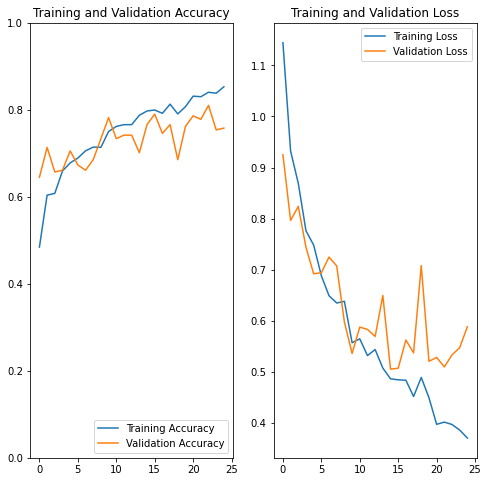

In [98]:
from matplotlib import pyplot as plt

history = best_history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# because of early stopping, can't just use "epochs"
epochs_range = range(len(history.history['loss']))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylim([0, 1])

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Evaluate on test data

In [108]:
model = create_model(num_classes=num_classes)
model.load_weights(os.path.join(ckpt_path, "val_acc_0.810.hdf5"))

loss, acc = model.evaluate(test_examples, test_labels)

print('\nevaluate on test set:\nloss = {:.5f}\tacc = {:.3f}%'.format(loss, acc*100))

13/14 [==========================>...] - ETA: 0s - loss: 0.6702 - accuracy: 0.7356

2022-04-30 11:57:19.493771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 10ms/step - loss: 0.6621 - accuracy: 0.7339

evaluate on test set:
loss = 0.66211	acc = 73.395%


In [76]:
%reset -f